In [8]:
%load_ext autoreload
%autoreload 2

import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval, Params

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data = {'categories' : [{'supercategory' : "", 'name' : 'decay', 'id' : 1}]}


In [10]:
with open('/home/kuntik/dev/datasets/dental_rtg_merged2/annotations.json', 'r') as f:
    ann_file = json.load(f)
with open('rtg2_preds4.json', 'r') as f:
    pred_file = json.load(f)

In [11]:
all_preds = []
pred_id = 0
train = []
val = []
for image in ann_file['images']:
    id = image['id']
    pred = pred_file[image['file_name']]
    # for pred in pred_file[image['file_name']]:
    for (bbox, score, label) in zip(pred['bboxes'], pred['scores'], pred['labels']):
        x1, y1, x2, y2 = bbox
        width = x2 - x1
        height = y2 - y1
        final_box = [x1,y1, width, height]
        area = width * height
        pred_dict = {'area' : area, 'id' : pred_id, 'bbox' : final_box, 'image_id' : id, 'category_id' : 1, 'score' : score}
        all_preds.append(pred_dict)
        pred_id += 1
    if pred['stage'] == 'valid':
        val.append(id)
    else:
        train.append(id)
data['images'] = ann_file['images']
data['annotations'] = all_preds
train_val = {'type' : 'id', 'train' : train, 'val' : val}


with open('rtg2_4.json', 'w') as fp:
    json.dump(data['annotations'], fp)

In [60]:
from prediction_evaluation import PredictionEval
dataDir = '/home/kuntik/dev/datasets/dental_merged'
annFile = '/home/kuntik/dev/datasets/dental_rtg_merged2/annotations.json'
resFile = 'rtg2_4.json'
with open('train_val_names.json', 'r') as f:
    train_val_names = json.load(f)
pred_eval = PredictionEval()
pred_eval.load_data_coco_files(annFile, resFile, train_val_names)
queries = pred_eval.default_queries()
# pred_eval.cocoEval.evaluate()
pred_eval.evaluate_map(queries, stage='val', summary=True)

# pred_eval.

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.72s)
creating index...
index created!
Running per image evaluation...
DONE (t=2.26s).
Accumulating evaluation results...
DONE (t=0.39s).
 Average Precision  (AP) @[ IoU=0.05:0.95 | area=   all | maxDets=100 ] = 0.249
0.24946326046349723
 Average Precision  (AP) @[ IoU=0.05:0.95 | area=   all | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.10      | area=   all | maxDets=100 ] = 0.760
0.760347660902615
 Average Precision  (AP) @[ IoU=0.10      | area=   all | maxDets=100 ] = 0.760
 Average Precision  (AP) @[ IoU=0.30      | area=   all | maxDets=100 ] = 0.734
0.7341479785896036
 Average Precision  (AP) @[ IoU=0.30      | area=   all | maxDets=100 ] = 0.734
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.631
0.6305479675531557
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.631
 Average Precision  (

[0.24946326046349723,
 0.760347660902615,
 0.7341479785896036,
 0.6305479675531557,
 0.2393606036087212,
 0.001003650407812381,
 0.5981582741731065,
 0.6706910254618299,
 0.6071896713124255]

In [67]:
pred_eval.map_by_iou()


Running per image evaluation...
DONE (t=10.11s).
Accumulating evaluation results...
DONE (t=2.18s).


array([1.        , 1.        , 0.99122807, 0.97560976, 0.97512438,
       0.96825397, 0.95709571, 0.95081967, 0.9468599 , 0.94642857,
       0.93714286, 0.9365942 , 0.93406593, 0.93406593, 0.92755682,
       0.92143808, 0.92009988, 0.91100703, 0.90481283, 0.90451745,
       0.90255906, 0.90234742, 0.89910714, 0.89899833, 0.896249  ,
       0.89375   , 0.89219331, 0.88864943, 0.88719723, 0.88071571,
       0.87691327, 0.87185776, 0.86935867, 0.86384439, 0.86117257,
       0.85395645, 0.85087719, 0.84853014, 0.84660194, 0.84198113,
       0.83687943, 0.83687943, 0.83205128, 0.83080169, 0.82873611,
       0.82324841, 0.82066277, 0.81900795, 0.81646274, 0.8140886 ,
       0.81027807, 0.808915  , 0.80276001, 0.79518856, 0.79183934,
       0.78983474, 0.78588957, 0.78016726, 0.77738723, 0.76901168,
       0.7591927 , 0.75221953, 0.74461942, 0.73621042, 0.72878826,
       0.72149442, 0.7106933 , 0.70244907, 0.69472979, 0.68690165,
       0.67261655, 0.66441718, 0.64753293, 0.63408616, 0.62105

In [30]:
pred_eval.cocoEval.eval['precision'].shape

(16, 101, 1, 4, 3)

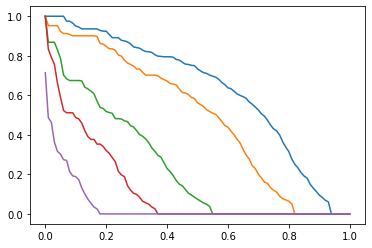

In [24]:
import matplotlib.pyplot as plt
import numpy as np
all_precision = pred_eval.cocoEval.eval['precision']

pr_0 = all_precision[0, :, 0, 0, 2] # data for IoU@0.5
pr_2 = all_precision[2, :, 0, 0, 2] # data for IoU@0.5
pr_4 = all_precision[4, :, 0, 0, 2] # data for IoU@0.7
pr_5 = all_precision[5, :, 0, 0, 2] # data for IoU@0.9
pr_6 = all_precision[6, :, 0, 0, 2] # data for IoU@0.9

x = np.arange(0, 1.01, 0.01)
plt.plot(x, pr_0, label='IoU@0.5')
plt.plot(x, pr_2, label='IoU@0.7')
plt.plot(x, pr_4, label='IoU@0.9')
plt.plot(x, pr_5, label='IoU@0.7')
plt.plot(x, pr_6, label='IoU@0.9')

plt.show()

In [23]:

all_precision[8, 0 ,0,0,2]

0.07142857142857142

In [40]:
len(pred_eval.val_ids)

520

In [5]:

pred_file.keys()
data.keys()
len(data['images'])
len(data['annotations'])

84575

In [25]:
with open('predictions2.json', 'w') as fp:
    json.dump(data['annotations'], fp)

In [19]:
annType = ['bbox']
prefix = 'instances'
dataDir = '/home/kuntik/dev/datasets/dental_merged'
annFile = '/home/kuntik/dev/datasets/dental_rtg_merged2/annotations.json'
cocoGt = COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [11]:
resFile = 'rtg2_preds1.json'
print(type(resFile['predictions']) == str) 
# resFile = resFile%(dataDir, prefix, ann)
cocoDt = cocoGt.loadRes(resFile)

True
Loading and preparing results...
DONE (t=0.48s)
creating index...
index created!


In [13]:
annType = 'bbox'
cocoEval = COCOeval(cocoGt, cocoDt)

In [8]:
params = Params()
params.setDetParams()
params.iouType = 'bbox'
cocoEval.params = params


NameError: name 'cocoEval' is not defined

In [14]:
import numpy as np
cocoEval.params.iouThrs = np.linspace(.2, 0.95, int(np.round((0.95 - .2) / .05)) + 1, endpoint=True)
cocoEval.evaluate()


Running per image evaluation...
DONE (t=5.87s).


In [66]:
cocoEval.params.iouThrs

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 , 0.85, 0.9 , 0.95])

In [16]:
cocoEval.accumulate()
# cocoEval._summarize(1, iouThr=.4, maxDets=cocoEval.params.maxDets[2])
cocoEval._summarize(1, iouThr=.2, maxDets=cocoEval.params.maxDets[2])



Accumulating evaluation results...
DONE (t=1.41s).
 Average Precision  (AP) @[ IoU=0.20      | area=   all | maxDets=100 ] = 0.749


0.749383264776497

In [16]:
cocoEval.accumulate()
cocoEval.summarize()

Accumulating evaluation results...
DONE (t=2.20s).
 Average Precision  (AP) @[ IoU=0.20:0.95 | area=   all | maxDets=100 ] = 0.398
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.588
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.101
 Average Precision  (AP) @[ IoU=0.20:0.95 | area= small | maxDets=100 ] = 0.306
 Average Precision  (AP) @[ IoU=0.20:0.95 | area=medium | maxDets=100 ] = 0.431
 Average Precision  (AP) @[ IoU=0.20:0.95 | area= large | maxDets=100 ] = 0.565
 Average Recall     (AR) @[ IoU=0.20:0.95 | area=   all | maxDets=  1 ] = 0.199
 Average Recall     (AR) @[ IoU=0.20:0.95 | area=   all | maxDets= 10 ] = 0.550
 Average Recall     (AR) @[ IoU=0.20:0.95 | area=   all | maxDets=100 ] = 0.598
 Average Recall     (AR) @[ IoU=0.20:0.95 | area= small | maxDets=100 ] = 0.531
 Average Recall     (AR) @[ IoU=0.20:0.95 | area=medium | maxDets=100 ] = 0.618
 Average Recall     (AR) @[ IoU=0.20:0.95 | area= large | maxDets=100

In [ ]:
cocoEval.analyze()